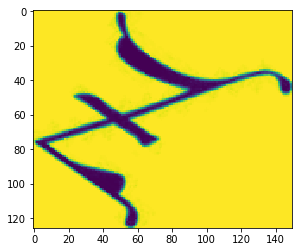

In [403]:
from skimage import io
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
image = cv2.imread('./gothic.png')

def paste(ss,tt,cc):
    x,y = ss.shape
    a = cc[0] - x//2
    b = cc[1] - y//2
    tt[a:a + x, b:b + y] = ss
    
def clip(img):
    pp = find_bands(img,ax=1)
    a,b = pp[0][0],pp[-1][-1]
    pp = find_bands(img,ax=0)
    c,d = pp[0][0],pp[-1][-1]
    return img[a:b,c:d]

def rot(img, tt=90):

    dd = int(np.sqrt(2)*max(img.shape))
    cc = dd//2
    xx = np.ones((dd,dd))
    paste(img,xx,(cc,cc))

    M = cv2.getRotationMatrix2D((cc,cc), tt, 1.)
    return clip(cv2.warpAffine(xx, M,
                         (dd,dd), borderValue=1.))

plt.imshow(rot(letters[-1],tt=145))




(107, 99, 3)

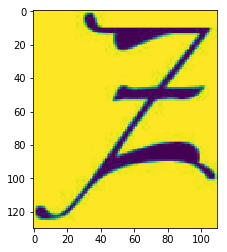

In [390]:
plt.imshow(letters[-1])

In [394]:
img = io.imread( "./gothic.png", as_gray=True)

def find_bands(img, ax=1):
    line_sum = img.sum(axis=ax)
    dd = img.shape[ax] - 1
    #clamp
    line_sum[line_sum<dd] = 0
    line_sum[line_sum>dd] = 1

    cx = np.convolve(line_sum, 
                     np.array([1,1,1]), 
                     mode = 'same' )

    bands = np.where(cx == 2)[0][1:-1]
    #plt.plot(cx)
    return  bands.reshape((-1,2))

letters = []
rows = find_bands(img,ax=1)
for a,b in rows:
    row = img[a:b,:]
    cols = find_bands(row,ax=0)
    for c,d in cols:
        letters.append(img[a:b,c:d])


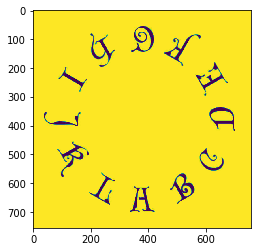

In [405]:

     
qq = letters[0]
y,x = qq.shape
dx = y*6
tt = np.ones((dx,dx))
cc = dx//2
R = cc - 100
T = np.linspace(0, 2*np.pi,13)
X, Y = R*np.cos(T) - cc, R*np.sin(T)- cc
X = X.astype(int)
Y = Y.astype(int)
for x,y,t,i in zip(X,Y,180*T/np.pi,range(12)):
    paste(rot(letters[i],t),tt, (x,y))
plt.imshow(tt)


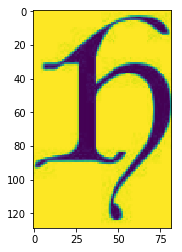

In [401]:
plt.imshow(letters[7])

In [346]:

hh,dd

(126, 178)

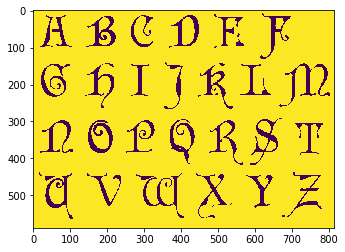

In [190]:
plt.imshow(img)

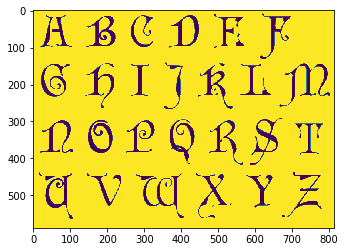

In [166]:
plt.imshow(img)

In [196]:
max(cx)

2439.0

In [197]:
588*3

1764